<a href="https://colab.research.google.com/github/CodeHunterOfficial/TimeSeriesForecast_2024-2025/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0_7_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Пример 2.** В качестве примера 2 рассматривается датасет jena_climate_2009_2016,  который содержит в себе климатические данные, собранные в Йене, Германия, с 2009 по 2016 год. Данные включают в себя различные метеорологические показатели, такие как атмосферное давление, температура, влажность, скорость, направление ветра и другие.

### Основные характеристики датасета:
Исследуемый датасет имеет следующие характеристики:

1. Формат: Архивный файл .zip, содержащий CSV-файл с данными.
2. Размер: 48.1+ MB в памяти, 420,551 строк и 15 столбцов.
3. Временной охват: Данные собирались с 2009 по 2016 год.
4. Метеорологические параметры:
   - Date Time - дата и время
   - p (mbar) - атмосферное давление (миллибары)
   - T (degC) - температура (градусы Цельсия)
   - Tpot (K) - потенциальная температура (Кельвин)
   - Tdew (degC) - температура точки росы (градусы Цельсия)
   - rh (%) - относительная влажность (проценты)
   - VPmax (mbar) - максимальное давление паров (миллибары)
   - VPact (mbar) - фактическое давление паров (миллибары)
   - VPdef (mbar) - дефицит давления паров (миллибары)
   - sh (g/kg) - удельная влажность (граммы на килограмм)
   - H2OC (mmol/mol) - концентрация водяного пара (миллимоль на моль)
   - rho (g/m**3) - плотность воздуха (граммы на кубический метр)
   - wv (m/s) - скорость ветра (метры в секунду)
   - max. wv (m/s) - максимальная скорость ветра (метры в секунду)
   - wd (deg) - направление ветра (градусы)
5. Источник: Данные собраны в Йене, Германия.
6. Структура данных: Данные представлены в виде pandas DataFrame с RangeIndex (420,551 строк) и 15 столбцами различных метеорологических показателей. Типы данных включают объектный (для столбца "Date Time") и 14 столбцов с типом float64.




## Предварительная обработка данных
Предобработка данных — это важный этап в процессе анализа данных, который заключается в подготовке и очистке данных для последующего анализа и моделирования. Для предобработки данных необходимо выполнить следующие шаги:

1. Импорт библиотек:

В первую очередь импоритруем все необходимые библиотеки.

In [ ]:
!pip install keras-vis

In [ ]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import scipy.stats as ss
from sklearn.impute import KNNImputer

from keras.utils import plot_model


Этот набор библиотек обеспечивает основной функционал, необходимый для задач машинного обучения с использованием TensorFlow и Keras:

- `tensorflow as tf`: основная библиотека для машинного обучения
- `numpy as np`, `pandas as pd`: работа с числовыми данными и таблицами
- `tensorflow.keras.*`: модули для построения, обучения и оценки моделей
- `matplotlib.pyplot as plt`: визуализация данных и результатов
-...

2. Загрузка и ознокомение с данными

После импорта необходимых библиотек загружаем датасет на dataFrame

In [ ]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)
df = pd.read_csv(csv_path)

13568290/13568290 [==============================] - 0s 0us/step


Вывести 5 первых записей

In [ ]:
df.head(5)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


Вывод более подробной информации по структуре датасета

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


Из df.info() видно что колонки Date Time имеет тип object. Необходимо его перевести в тип датавремя

In [ ]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df.head(5)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


Вывод количества строк (записей)  из нашего датасета

In [ ]:
print(df.shape)

(420551, 15)


Чтобы вывести основные статистические характеристики данных по каждому числовому признаку (типы int64 и float64) используем метод describe

In [ ]:
print(df.describe())

            p (mbar)       T (degC)       Tpot (K)    Tdew (degC)  \
count  420551.000000  420551.000000  420551.000000  420551.000000   
mean      989.212776       9.450147     283.492743       4.955854   
std         8.358481       8.423365       8.504471       6.730674   
min       913.600000     -23.010000     250.600000     -25.010000   
25%       984.200000       3.360000     277.430000       0.240000   
50%       989.580000       9.420000     283.470000       5.220000   
75%       994.720000      15.470000     289.530000      10.070000   
max      1015.350000      37.280000     311.340000      23.110000   

              rh (%)   VPmax (mbar)   VPact (mbar)   VPdef (mbar)  \
count  420551.000000  420551.000000  420551.000000  420551.000000   
mean       76.008259      13.576251       9.533756       4.042412   
std        16.476175       7.739020       4.184164       4.896851   
min        12.950000       0.950000       0.790000       0.000000   
25%        65.210000       7.7800

### Предобработка данных.

Данный этап включает в себя следующие шаги:


* Проверка наличия пропущенных значений в данных
* Обработка выбросов
* Масштабирование и нормализация данных
* Разделение данных на обучающую и тестовую выборки

**1. Проверка наличия пропущенных значений:**

Проверим наличие пропущенных значений для каждого признака в нашем наборе данных.

In [ ]:
# Проверка наличия пропущенных значений
print(df.isnull().sum())

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64


###Обработка пропущенных значений

Из этого результата видно, что в данных отсутствуют пропущенные значения.

Тем не менее, в случае наличия пропущенных значений можно использовать один из следующих методов:


1) Заполнить пропуски средним/медианным значением по столбцу:

```
# Заполнить пропуски средним значением
df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# Заполнить пропуски медианным значением
df['column_name'].fillna(df['column_name'].median(), inplace=True)
```

2) Заполнить пропуски с помощью методов интерполяции:



```
# Линейная интерполяция
df['column_name'].interpolate(method='linear', inplace=True)

# Интерполяция по времени (для временных рядов)
df['column_name'].interpolate(method='time', inplace=True)

# Полиномиальная интерполяция
df['column_name'].interpolate(method='index', order=2, inplace=True)
```

3) Удалить строки с пропущенными значениями:



```
# Удалить строки с любыми пропущенными значениями
df.dropna(inplace=True)

# Удалить строки, где пропущено значение в указанном столбце
df.dropna(subset=['column_name'], inplace=True)
```


4) Использовать методы машинного обучения для предсказания отсутствующих значений:



```
# Создание и обучение модели
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df)

# Замена пропущенных значений предсказаниями
df['column_name'] = df_imputed[:, column_index]
```

В этом примере мы используем алгоритм k-ближайших соседей (KNNImputer) для предсказания пропущенных значений. Но можно также использовать и другие методы, такие как линейная регрессия или деревья решений, в зависимости от характера данных.
Также обратите внимание, что в некоторых случаях может потребоваться дополнительная предварительная обработка данных перед применением методов интерполяции или машинного обучения.



**2. Обработка выбросов**



Для обработки выбросов в вашем датафрейме df мы можем использовать несколько подходов. Вот примеры кода для реализации некоторых методов:

1) Использование межквартильного размаха (IQR):

Сначала мы очищаем данные, удаляя выбросы с использованием межквартильного размаха (IQR).

In [ ]:
# Сохраняем индекс
index = df.index

# Выберите только числовые столбцы для масштабирования
num_cols = df.select_dtypes(include=[np.number]).columns

# Оставляем только численные столбцы
df_numeric = df[num_cols]

# Вычисление межквартильного размаха для каждого столбца
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Определение нижней и верхней границ для выбросов
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Идентификация и обработка выбросов
df_cleaned = df_numeric.mask((df_numeric < lower) | (df_numeric > upper), np.nan)
df_cleaned.shape

df_cleaned.head(5)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


В этом примере мы вычисляем межквартильный размах (IQR) для каждого столбца, а затем определяем верхнюю и нижнюю границы для выбросов как 1.5 * IQR от 1-го и 3-го квартилей соответственно. Затем мы заменяем выбросы на NaN-значения.

2) Применение z-оценок:

In [ ]:
# Сохраняем индекс
index = df.index

# Выберите только числовые столбцы для масштабирования
num_cols = df.select_dtypes(include=[np.number]).columns

# Оставляем только численные столбцы
df_numeric = df[num_cols]

# Вычисление z-оценок для каждого столбца
z_scores = df_numeric.apply(zscore)

# Определение порога для выбросов (например, 3.0)
threshold = 3.0

# Идентификация и обработка выбросов
df_cleaned = df_numeric.where(abs(z_scores) < threshold, np.nan)
df_cleaned.shape
df_cleaned.head(5)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


**3. Масштабирование и нормализация данных:**

Масштабирование данных с использованием StandardScaler

In [ ]:
# Сохраняем индекс
index = df.index

# Выберите только числовые столбцы для масштабирования
num_cols = df.select_dtypes(include=[np.number]).columns

# Создайте объект StandardScaler
scaler = StandardScaler()

# Масштабируйте числовые столбцы
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols, index=index)

df_scaled.head(5)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,0.874230,-2.074013,-2.127441,-2.058615,1.049501,-1.323974,-1.535256,-0.780587,-1.536973,-1.539462,2.293606,-0.010271,-0.018931,-0.258922
2009-01-01 00:20:00,0.880212,-2.120313,-2.173300,-2.115073,1.055570,-1.336896,-1.556766,-0.782629,-1.555797,-1.560712,2.344887,-0.015008,-0.022553,-0.445813
2009-01-01 00:30:00,0.875426,-2.132184,-2.185058,-2.119531,1.085917,-1.339480,-1.559156,-0.784671,-1.559562,-1.563073,2.355894,-0.023106,-0.035159,-0.036268
2009-01-01 00:40:00,0.873033,-2.108441,-2.160365,-2.083873,1.104125,-1.333019,-1.544816,-0.786713,-1.544502,-1.548907,2.329628,-0.020814,-0.037042,0.268295
2009-01-01 00:50:00,0.873033,-2.103692,-2.156838,-2.079416,1.098056,-1.331727,-1.542426,-0.786713,-1.544502,-1.546546,2.324875,-0.021120,-0.035159,0.456340


Нормализация данных с использованием MinMaxScaler

In [ ]:
# Сохраняем индекс
index = df.index

# Выберите только числовые столбцы для масштабирования
num_cols = df.select_dtypes(include=[np.number]).columns

# Нормализация числовых столбцов
normalizer = MinMaxScaler()
df_normalized = pd.DataFrame(normalizer.fit_transform(df[num_cols]), columns=num_cols, index=index)

df_normalized.head(5)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,0.814939,0.248632,0.243662,0.334788,0.923033,0.037886,0.084272,0.004782,0.081679,0.082798,0.743213,0.997262,0.997830,0.423056
2009-01-01 00:20:00,0.815430,0.242163,0.237241,0.326891,0.924182,0.036294,0.081003,0.004564,0.078843,0.079586,0.749349,0.997231,0.997805,0.378056
2009-01-01 00:30:00,0.815037,0.240504,0.235594,0.326268,0.929925,0.035976,0.080639,0.004347,0.078276,0.079229,0.750666,0.997178,0.997718,0.476667
2009-01-01 00:40:00,0.814840,0.243822,0.239052,0.331255,0.933372,0.036772,0.082819,0.004130,0.080545,0.081370,0.747523,0.997193,0.997705,0.550000
2009-01-01 00:50:00,0.814840,0.244485,0.239546,0.331879,0.932223,0.036931,0.083182,0.004130,0.080545,0.081727,0.746954,0.997191,0.997718,0.595278


**4. Разделение данных на обучающую и тестовую выборки**




После проверки наличия пропущенных значений, обработки выбросов, масштабирования и нормализации данных, для разработки модели CNN и линейной модели необходимо, чтобы данные были разделены на обучающую, валидационную и тестовую выборки.

- Обучающая выборка используется для тренировки модели.
- Валидационная выборка используется для настройки гиперпараметров модели.  
- Тестовая выборка используется для оценки производительности модели на независимых данных, которые не участвовали в обучении.

Такое разделение данных позволяет избежать переобучения и оценить, насколько хорошо модель будет работать на новых, неизвестных данных.

Для разделения данных на эти выборки, мы используем функцию df_to_X_y(). Эта функция преобразует pandas DataFrame в numpy массивы входных данных X и целевых значений y, используя заданный размер окна window_size. Окно размера window_size позволяет создать последовательные наборы входных данных, где каждый набор содержит window_size предшествующих значений, а целевое значение - следующее за ними.

In [ ]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        X.append(df_as_np[i:i+window_size])
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

WINDOW_SIZE = 5
temp = df['T (degC)']
X, y = df_to_X_y(df, WINDOW_SIZE)

# Процентное разделение данных на обучающую, валидационную и тестовую выборки
train_percentage = 0.6
val_percentage = 0.1
test_percentage = 0.3

train_size = int(len(X) * train_percentage)
val_size = int(len(X) * val_percentage)
test_size = len(X) - train_size - val_size

X_train = X[:train_size]
y_train = y[:train_size]
X_val = X[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]
X_test = X[train_size+val_size:]
y_test = y[train_size+val_size:]

print(f"Размеры выборок:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Размеры выборок:
X_train: (252327, 5, 15)
y_train: (252327, 15)
X_val: (42054, 5, 15)
y_val: (42054, 15)
X_test: (126165, 5, 15)
y_test: (126165, 15)


In [ ]:
# [[[1], [2], [3], [4], [5]]] [6] - 16.67% of the data
# [[[2], [3], [4], [5], [6]]] [7] - 16.67% of the data
# [[[3], [4], [5], [6], [7]]] [8] - 16.67% of the data

def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        #row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(df_as_np[i:i+window_size])
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

# Разделение данных на обучающую, валидационную и тестовую выборки
train_size = int(len(X1) * 0.6)  # 60% данных
val_size = int(len(X1) * 0.1)  # 10% данных
test_size = len(X1) - train_size - val_size  # 30% данных

X_train1, y_train1 = X1[:train_size], y1[:train_size]
X_val1, y_val1 = X1[train_size:train_size+val_size], y1[train_size:train_size+val_size]
X_test1, y_test1 = X1[train_size+val_size:], y1[train_size+val_size:]

print(f"X_train1 shape: {X_train1.shape}, y_train1 shape: {y_train1.shape}")
print(f"X_val1 shape: {X_val1.shape}, y_val1 shape: {y_val1.shape}")
print(f"X_test1 shape: {X_test1.shape}, y_test1 shape: {y_test1.shape}")

X_train1 shape: (252327, 5), y_train1 shape: (252327,)
X_val1 shape: (42054, 5), y_val1 shape: (42054,)
X_test1 shape: (126165, 5), y_test1 shape: (126165,)


Стоит отметить, что для обработки временного ряда целевой переменной будет использоваться значение следующего шага в ряду. Модель, обученная на этих данных, должна уметь предсказывать следующее значение в ряду, используя предыдущие window_size значений.

## Визуализация данных


Для визуализации данного набора данных можно выполнить следующие шаги:

1. Исследование распределения данных:

Этот шаг необходим для того, чтобы понять, как распределены значения каждого признака в наборе данных. Визуализация гистограмм с кривой плотности (kernel density estimation) поможет выявить особенности в распределении.

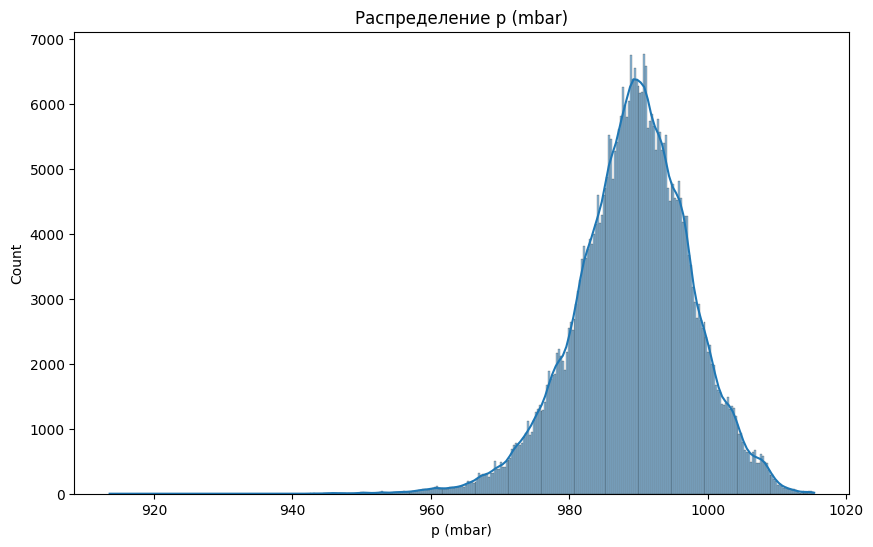

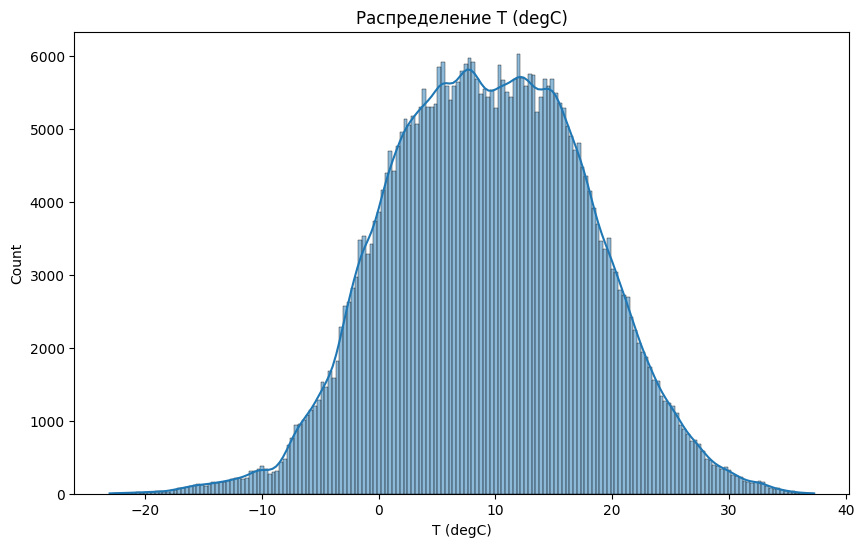

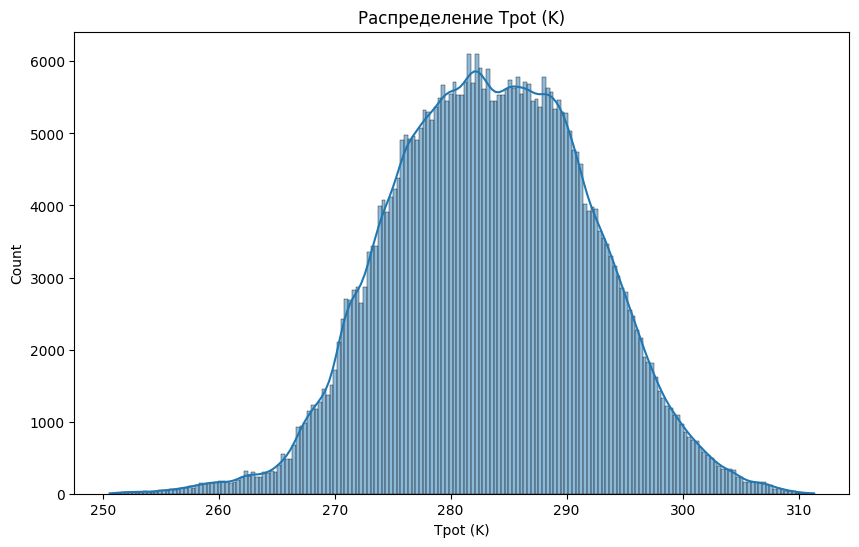

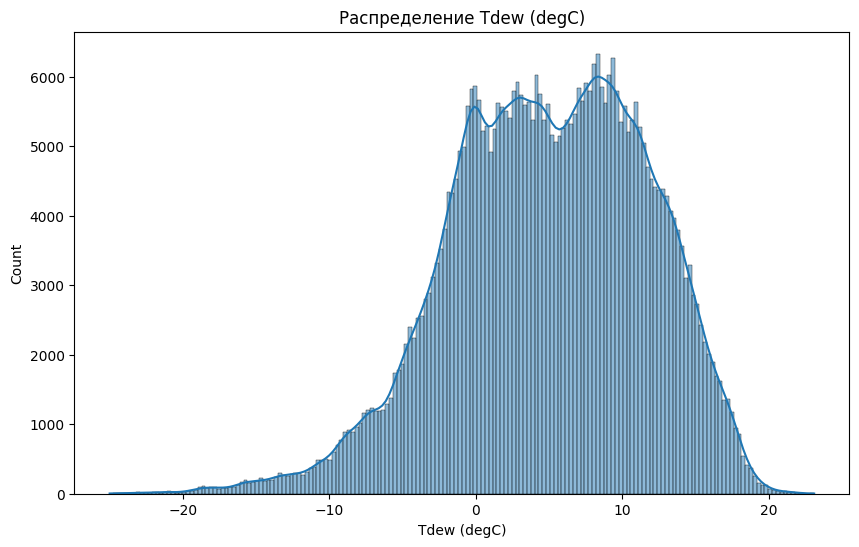

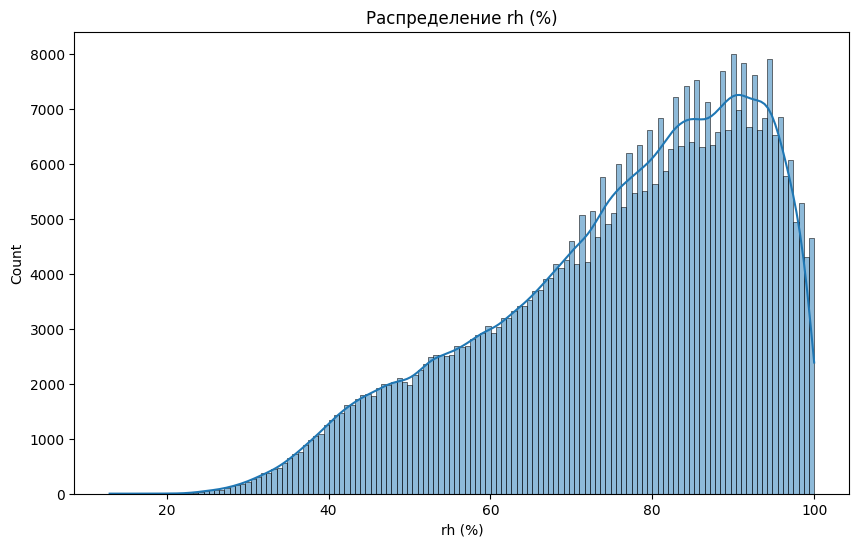

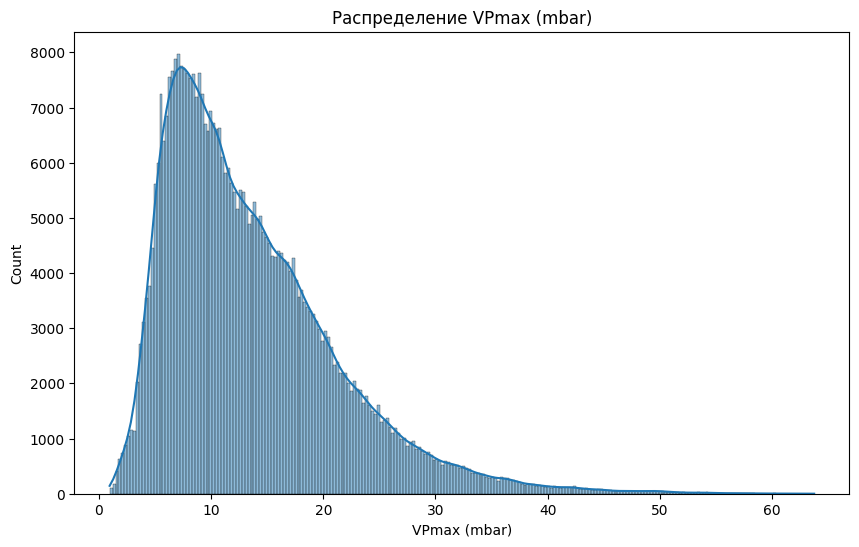

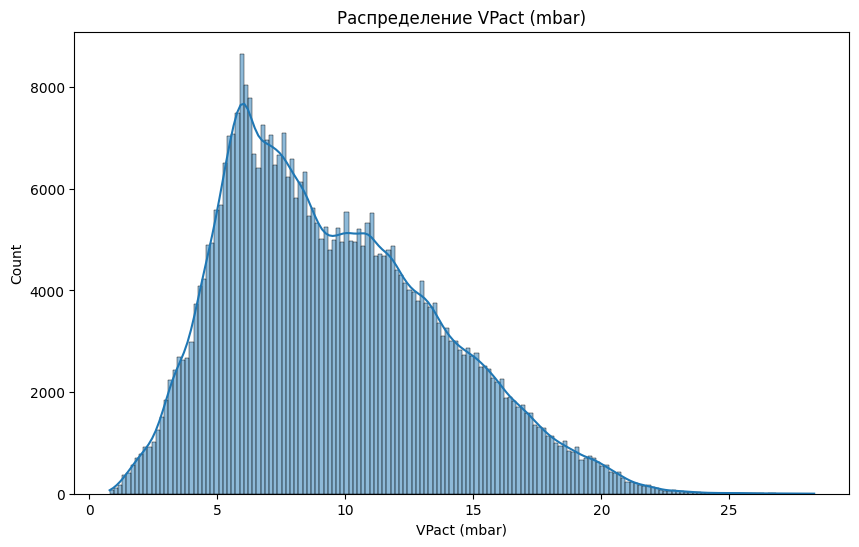

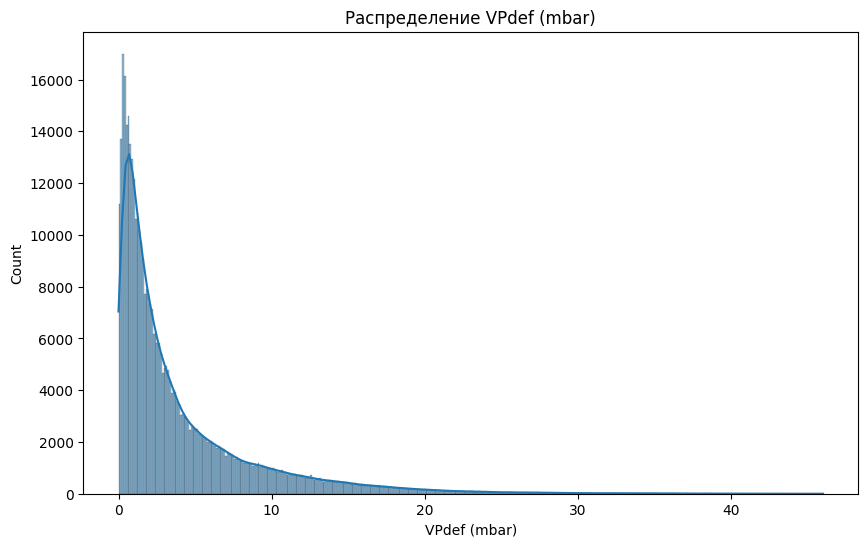

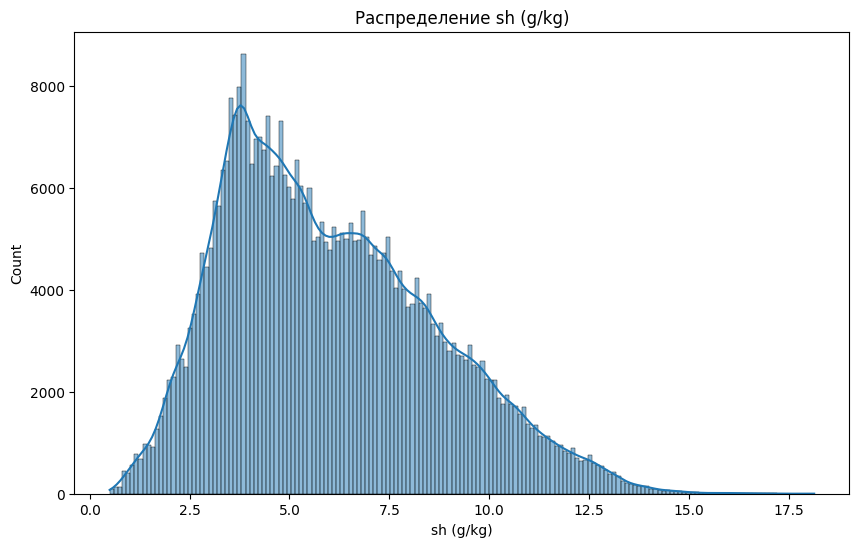

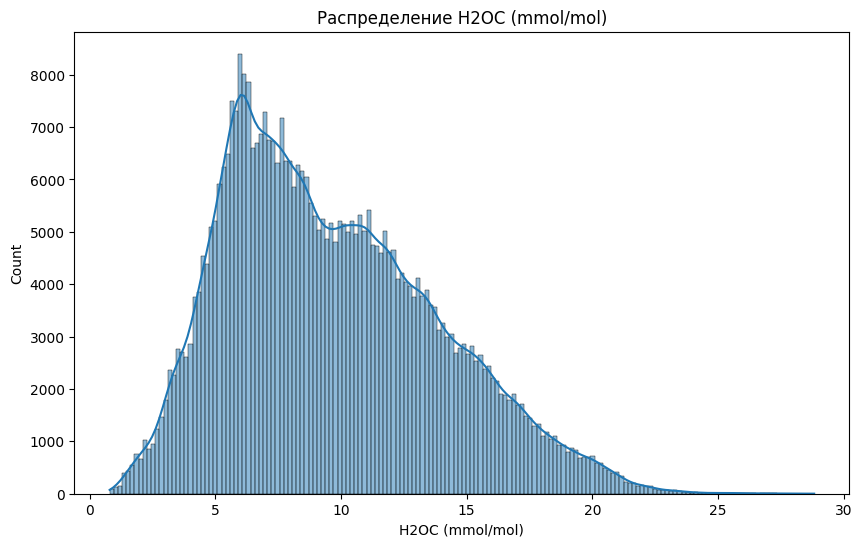

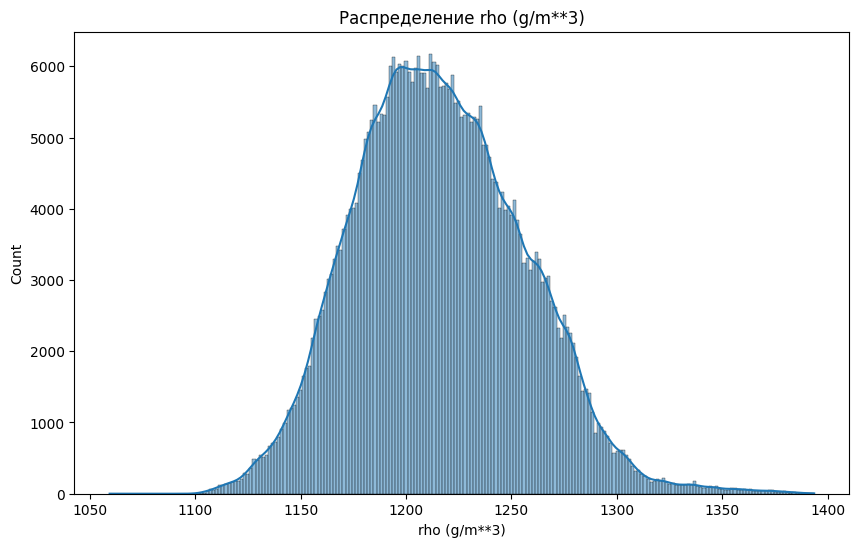

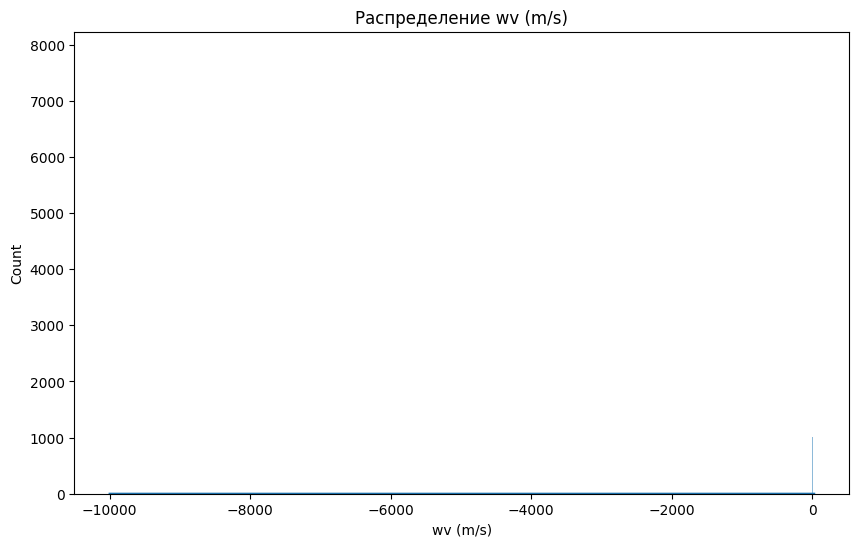

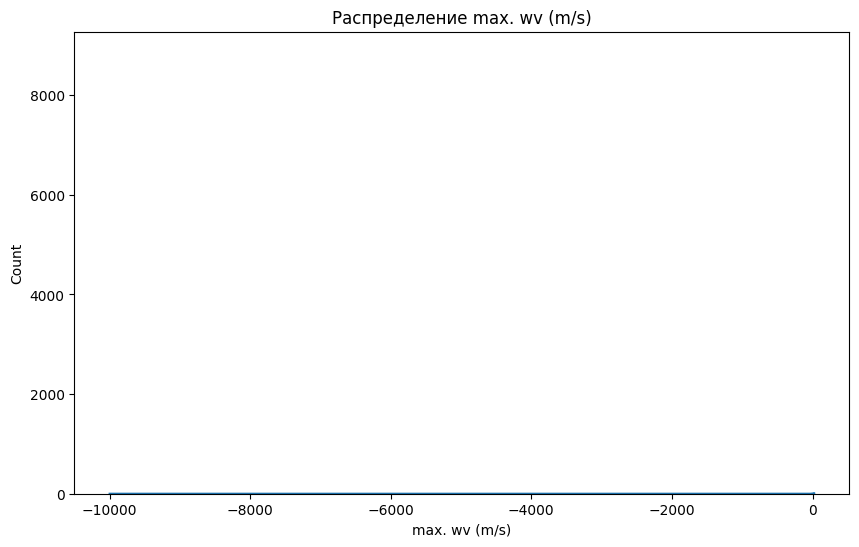

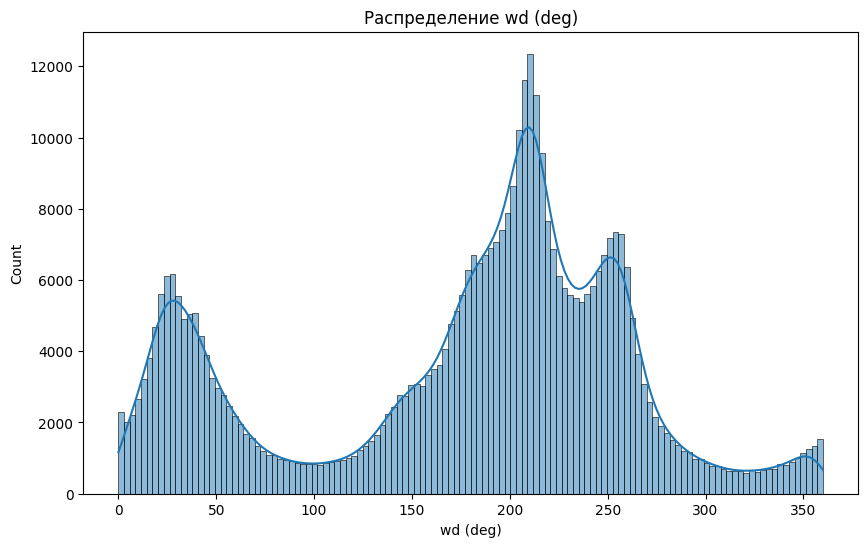

In [ ]:
# Выберите только числовые столбцы для масштабирования
num_cols = df.select_dtypes(include=[np.number]).columns
for col in df[num_cols].columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Распределение {col}')
    plt.show()

2. Визуализация временных рядов:

Этот шаг необходим для того, чтобы визуализировать динамику изменения нескольких признаков во времени. Это поможет выявить тренды, сезонность и другие временные закономерности в данных.

<Axes: xlabel='Date Time'>

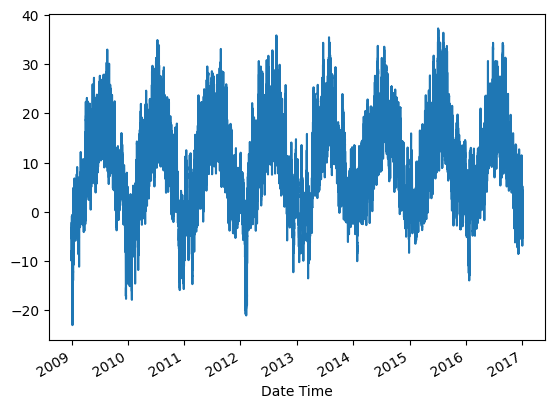

In [ ]:
temp.plot()

3. Визуализация зависимостей между признаками:

Этот шаг позволяет визуализировать взаимосвязь между двумя признаками в виде точечного графика. Это поможет понять, как изменение одного признака влияет на другой, и выявить потенциальные линейные или нелинейные зависимости.

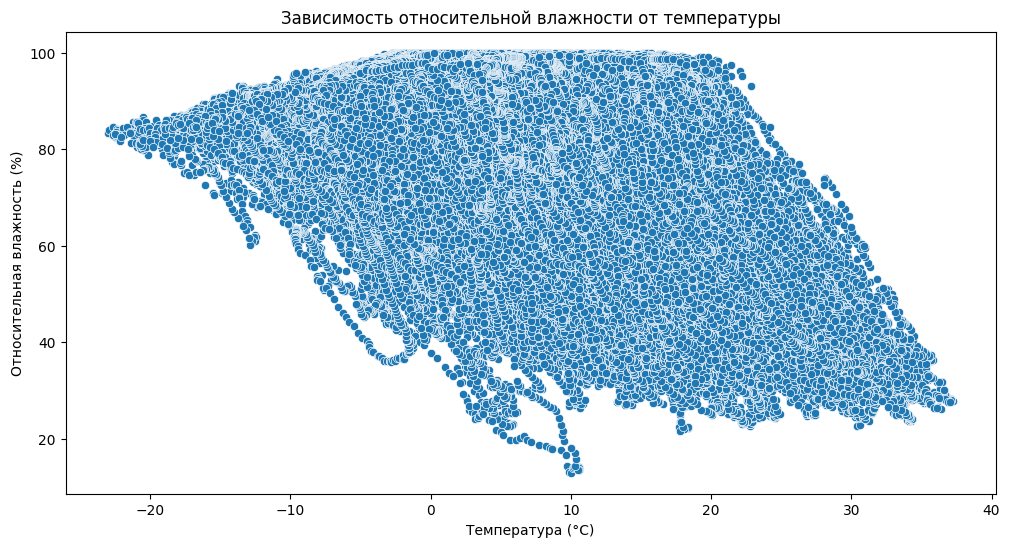

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.scatterplot(x='T (degC)', y='rh (%)', data=df)
plt.title('Зависимость относительной влажности от температуры')
plt.xlabel('Температура (°C)')
plt.ylabel('Относительная влажность (%)')
plt.show()

4. Визуализация корреляции между признаками:

Этот шаг позволяет визуализировать матрицу корреляций между всеми признаками в наборе данных. Это поможет понять, какие признаки сильно связаны друг с другом, и выявить потенциальные взаимозависимости.


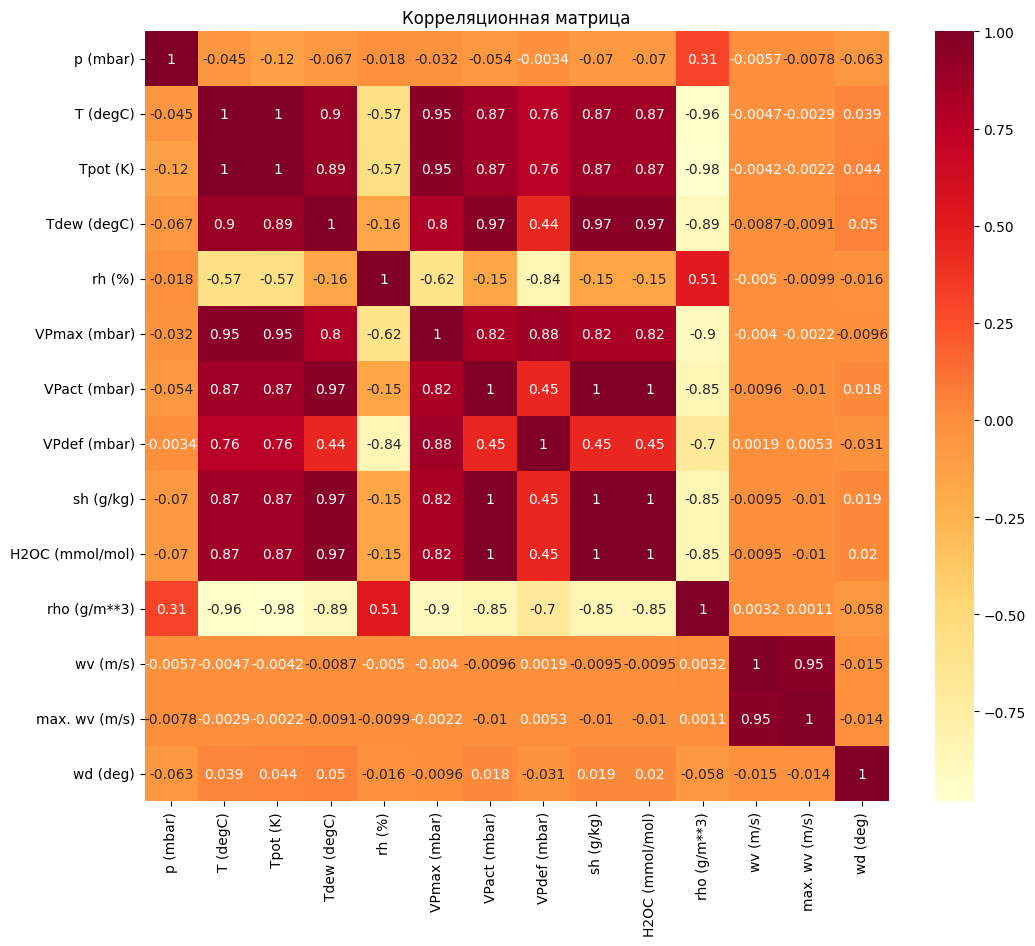

In [ ]:
# Выберите только числовые столбцы для масштабирования
num_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
# Вычисление матрицы корреляции
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица')
plt.show()

# Вывод матрицы корреляции
#print(corr_matrix)

Эта матрица корреляции показывает, что связя между различными атмосферными параметрами, измеренными в нашем наборе данных.

Основные моменты:

1. **Давление (p)**: Давление имеет отрицательную корреляцию с температурой, потенциальной температурой и влажностью, но положительную корреляцию с плотностью воздуха.

2. **Температура (T, Tpot)**: Температура и потенциальная температура сильно коррелируют друг с другом (r = 0.997), что ожидаемо, поскольку они являются связанными параметрами. Обе имеют сильную положительную корреляцию с парциальным давлением водяного пара (VPmax, VPact), удельной влажностью (sh, H2OC) и отрицательную корреляцию с относительной влажностью (rh) и плотностью воздуха (rho).

3. **Влажность (rh, Tdew, VPact, VPdef, sh, H2OC)**: Различные показатели влажности, такие как относительная влажность, температура точки росы, парциальное давление водяного пара, удельная влажность, демонстрируют сильные корреляции друг с другом, как ожидается.

4. **Ветер (wv, max. wv)**: Скорость ветра и максимальная скорость ветра слабо связаны (r = 0.95), что указывает на то, что эти параметры не сильно коррелируют с другими атмосферными переменными.

Таким образом, эта матрица корреляции позволяет понять взаимосвязи между различными метеорологическими параметрами, измеренными в этом наборе данных.

5. Для для визуализации распределения признаков построим QQ-Plot для всех признаков.

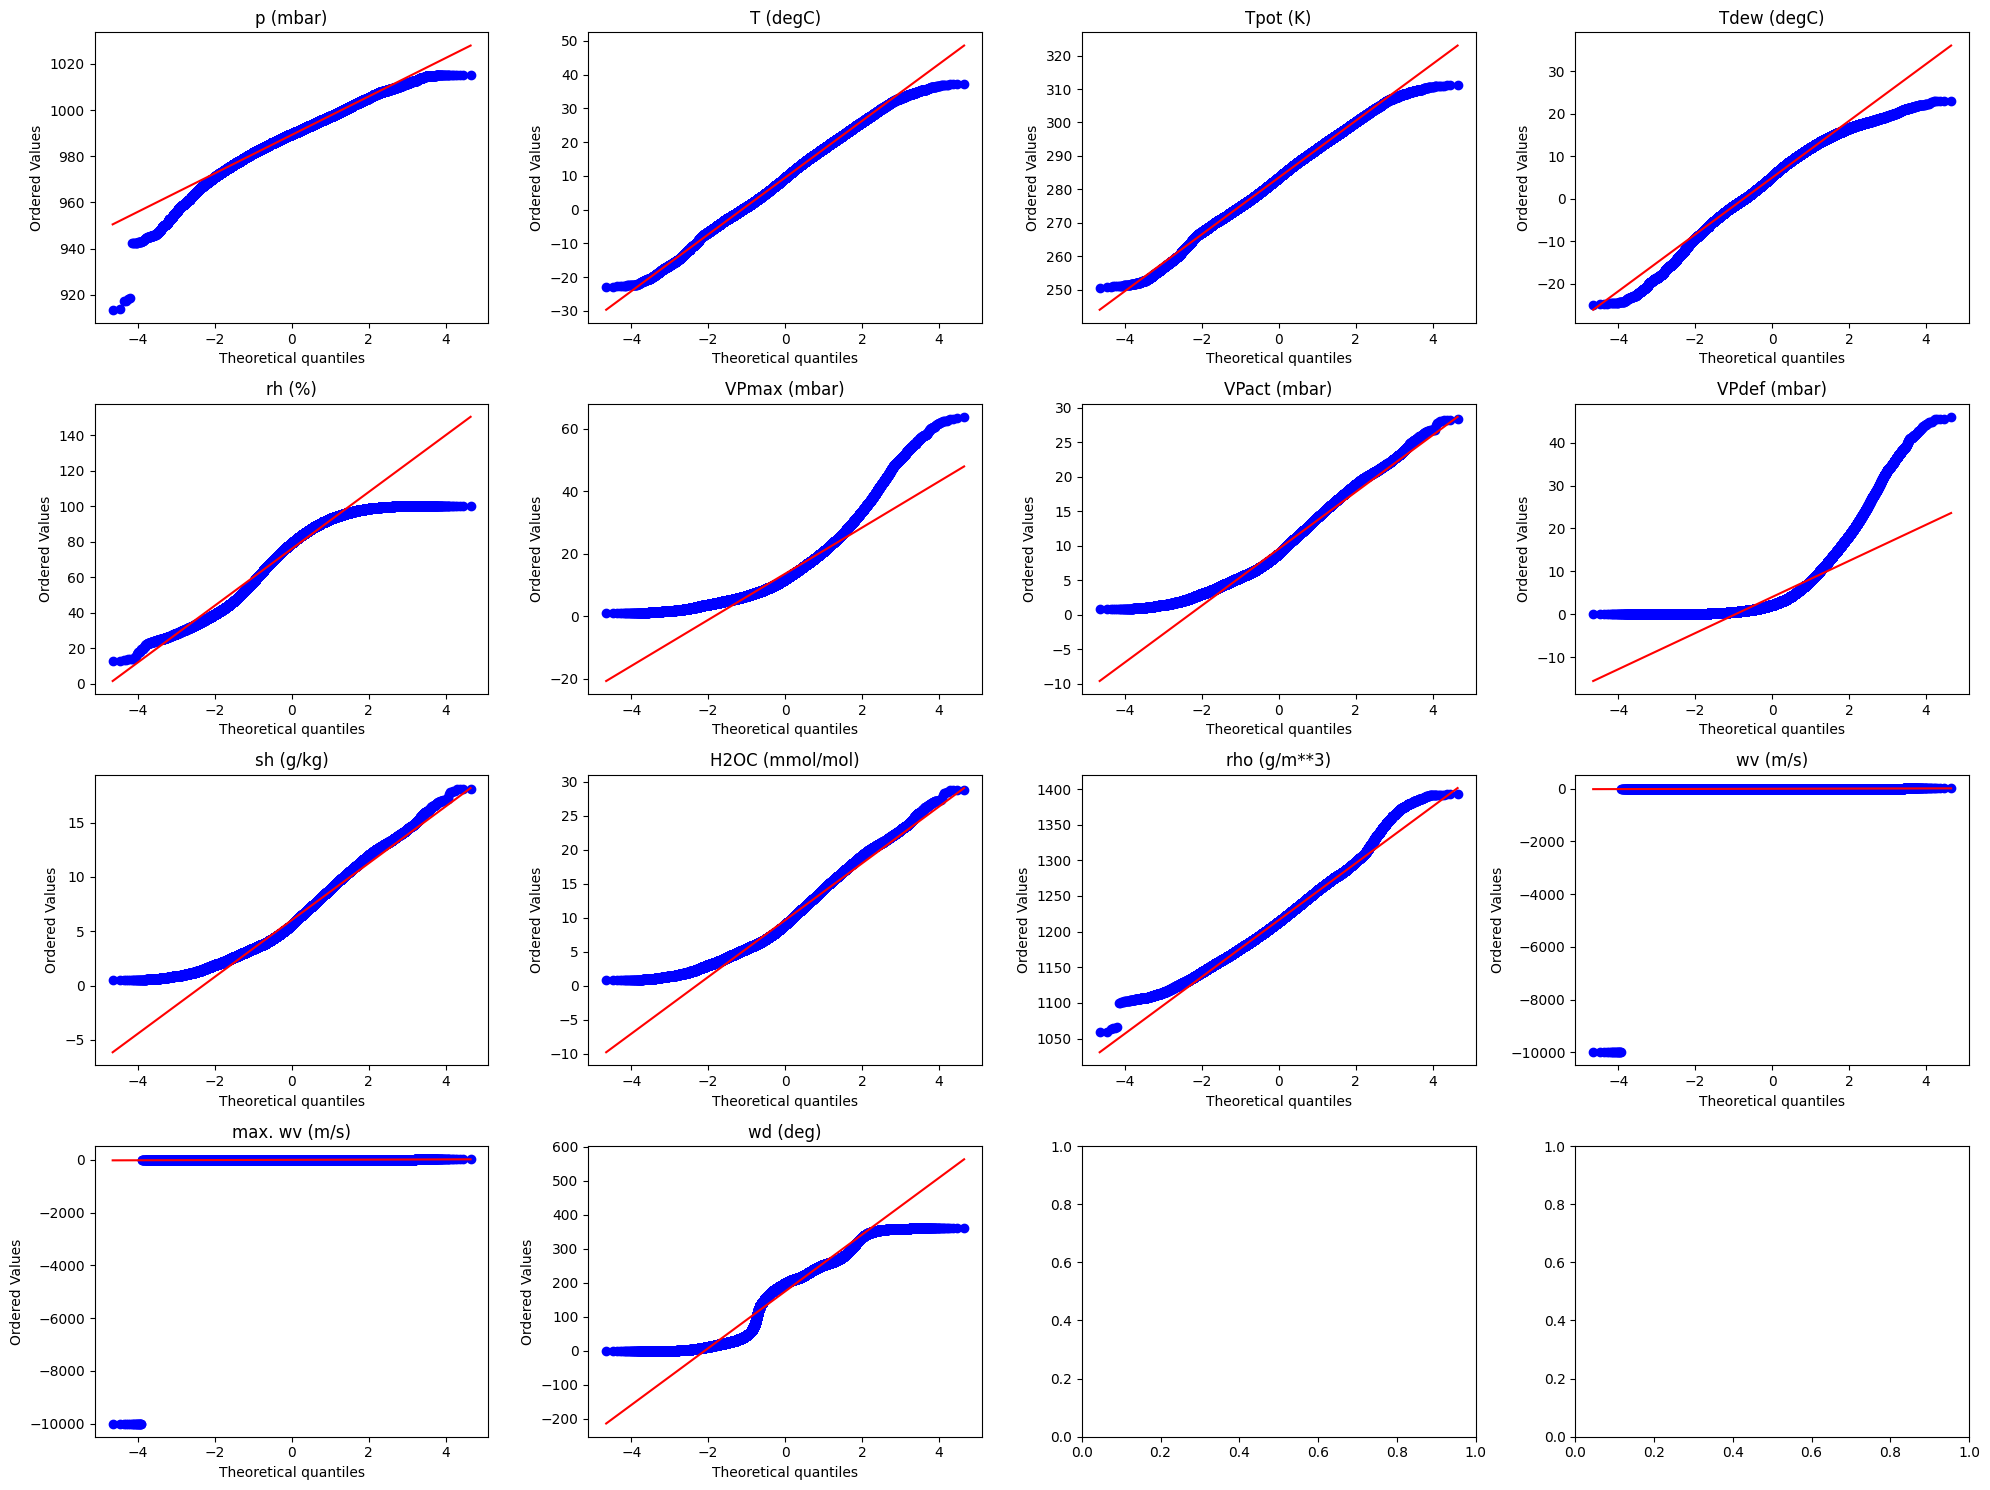

In [ ]:
from scipy import stats

# Создаем фигуру для сетки QQ-plots
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

# Строим QQ-plot для каждого признака
for i, col in enumerate(df[num_cols].columns):
    stats.probplot(df[col], plot=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

6. Ящики с усами для каждого признака

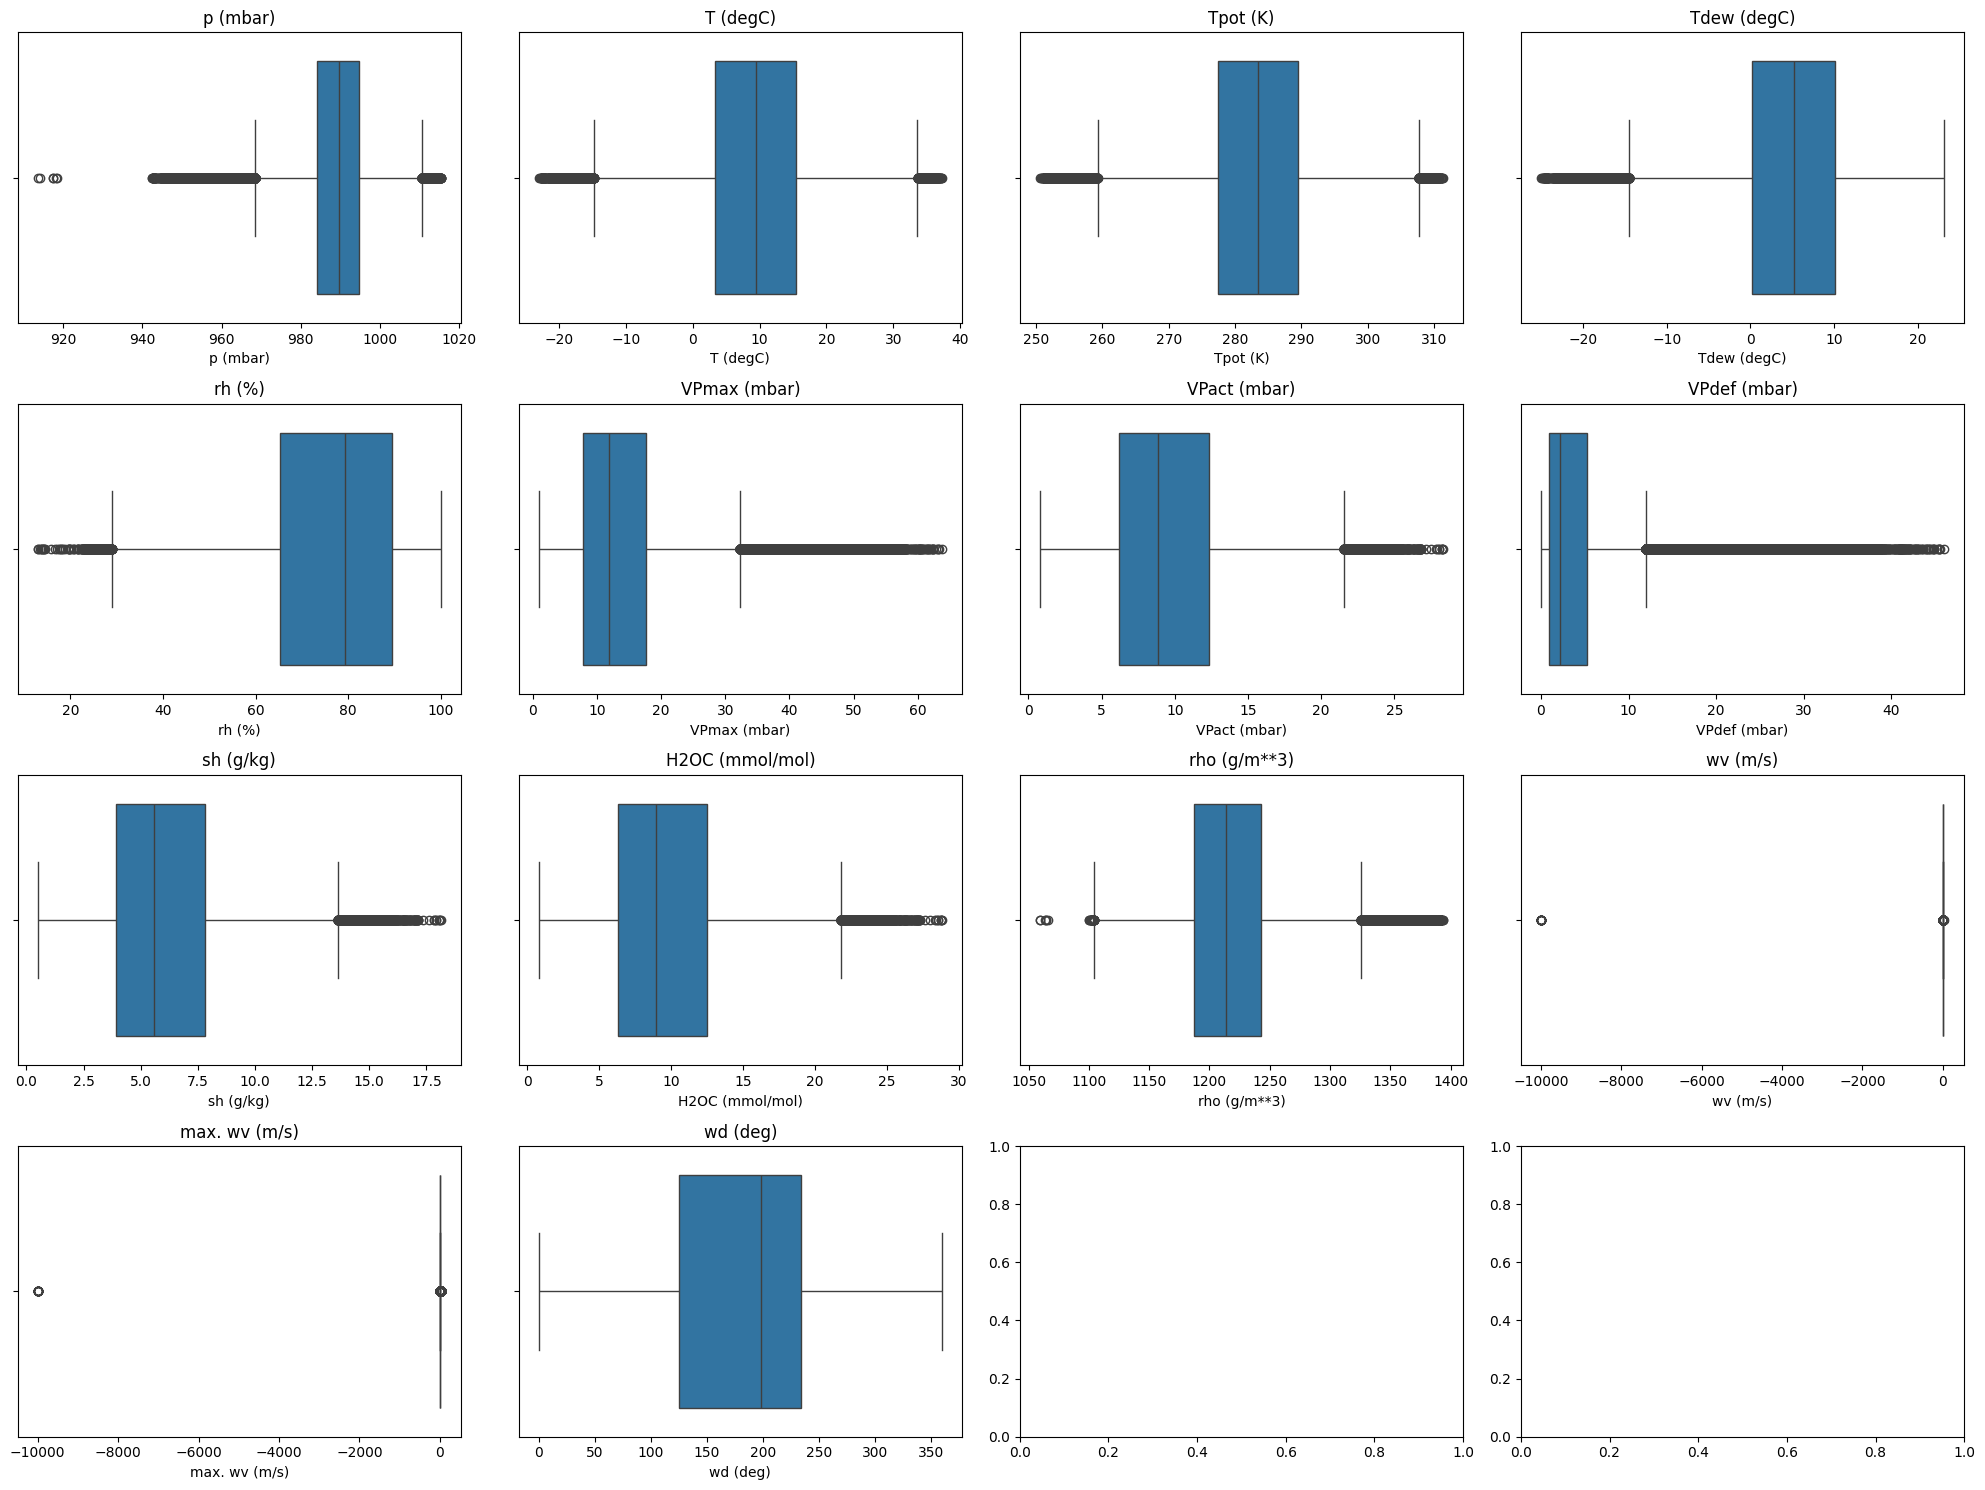

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns
# Создаем фигуру для сетки box plots
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

# Строим box plot для каждого признака
for i, col in enumerate(df[num_cols].columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## Создание и обучение модель CNN

После тщательной предварительной обработки данных теперь можно приступить к созданию и обучению моделей для прогнозирования исследуемого временного ряда.

In [ ]:
model1 = Sequential()
#model1.add(InputLayer(WINDOW_SIZE,1))
model1.add(Conv1D(64, 2, activation='relu', input_shape=(WINDOW_SIZE, 1)))
model1.add(Flatten())
model1.add(Dense(32,'relu'))
model1.add(Dense(16,'relu'))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 32)                8224      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9089 (35.50 KB)
Trainable params: 9089 (35

Этот код создает модель сверточной нейронной сети (CNN) в Keras:

1. `model1 = Sequential()` - создает последовательную модель Keras.
2. `model1.add(Conv1D(64, 2, activation='relu', input_shape=(WINDOW_SIZE, 1)))` - добавляет сверточный слой с 64 фильтрами размером 2, с функцией активации ReLU. Ожидается, что входные данные имеют форму `(WINDOW_SIZE, 1)`.
3. `model1.add(Flatten())` - добавляет слой "сплющивания", преобразующий выходные данные сверточного слоя в одномерный вектор.
4. `model1.add(Dense(32,'relu'))`, `model1.add(Dense(16,'relu'))`, `model1.add(Dense(8, 'relu'))` - добавляет 3 полносвязных слоя с 32, 16 и 8 нейронами соответственно, с функцией активации ReLU.
5. `model1.add(Dense(1, 'linear'))` - добавляет финальный полносвязный слой с одним нейроном и линейной функцией активации.
6. `model1.summary()` - выводит информацию о созданной модели.

Таким образом, этот код определяет архитектуру CNN-модели, состоящей из сверточного слоя, слоя "сплющивания" и нескольких полносвязных слоев. Эта модель может быть использована для решения задач, требующих обработки последовательных входных данных.

Для наглядного представления визуализируем структуру данной модели.

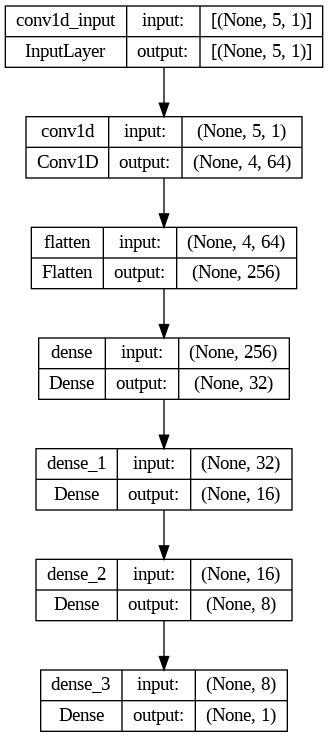

In [ ]:
# Визуализация структуры модели
plot_model(model1, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

Чтобы многократно использовать модель, создадим callback для сохранения лучшей модели во время тренировки.

Для этого используется:
- `ModelCheckpoint('model1/', save_best_only=True)` - сохраняет только лучшую версию модели в директории "model1/"

Далее, модель компилируется со следующими параметрами:
- loss function: MeanSquaredError
- optimizer: Adam с learning_rate=0.001
- metric: RootMeanSquaredError

Таким образом, модель будет тренироваться, минимизируя среднеквадратичную ошибку, используя оптимизатор Adam. В качестве метрики для отслеживания прогресса будет использоваться корень из среднеквадратичной ошибки.

In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

После компиляции модели, мы начинаем ее обучать с использованием:

X_train1, y_train1 - данные для обучения
X_val1, y_val1 - данные для валидации
epochs=10 - модель будет обучаться в течение 10 эпох
callbacks=[cp1] - использование ранее определенного callback cp1 (ModelCheckpoint), который сохраняет лучшую версию модели во время обучения.

Это реализуется с помощью следующего кода:

In [ ]:
history=model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
7886/7886 [==============================] - 30s 4ms/step - loss: 0.1173 - root_mean_squared_error: 0.3425 - val_loss: 0.1381 - val_root_mean_squared_error: 0.3716
Epoch 2/10
7886/7886 [==============================] - 25s 3ms/step - loss: 0.0550 - root_mean_squared_error: 0.2346 - val_loss: 0.0443 - val_root_mean_squared_error: 0.2105
Epoch 3/10
7886/7886 [==============================] - 24s 3ms/step - loss: 0.0541 - root_mean_squared_error: 0.2325 - val_loss: 0.0431 - val_root_mean_squared_error: 0.2075
Epoch 4/10
7886/7886 [==============================] - 25s 3ms/step - loss: 0.0524 - root_mean_squared_error: 0.2289 - val_loss: 0.0619 - val_root_mean_squared_error: 0.2488
Epoch 5/10
7886/7886 [==============================] - 22s 3ms/step - loss: 0.0512 - root_mean_squared_error: 0.2262 - val_loss: 0.0453 - val_root_mean_squared_error: 0.2128
Epoch 6/10
7886/7886 [==============================] - 24s 3ms/step - loss: 0.0508 - root_mean_squared_error: 0.2254 - val_l

### Использование модель CNN для задачи прогнозирования

Загружаем предварительно обученную модель, которая была сохранена в директории "model1/".

In [ ]:
model1 = load_model('model1/')

load_model('model1/') - это функция из библиотеки Keras, которая загружает модель, сохраненную в указанной директории. Это может быть полезно в следующих случаях:

Когда вы уже обучили модель ранее и хотите использовать ее повторно, не проводя повторной тренировки.

Когда вы разработали и обучили модель на одном компьютере, а теперь хотите использовать ее на другом компьютере.

Когда вы хотите использовать модель, сохраненную кем-то другим, например, в рамках соревнования по машинному обучению.

После вызова этой функции, загруженная модель доступна через переменную model1, которую вы можете использовать для дальнейших действий, таких как:

* Оценка модели на новых данных
* Дообучение модели
* Использование модели для прогнозирования

Таким образом, этот код позволяет повторно использовать уже обученную модель без необходимости проводить полный цикл обучения с самого начала.

1. Используем обученную модель `model1` для предсказаний на тренировочных данных `X_train1`.
2. Создаем pandas DataFrame `train_results` с двумя столбцами: предсказанными значениями и фактическими значениями.
3. Выводим первые 5 строк DataFrame для быстрого просмотра.

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results.head()

7886/7886 [==============================] - 14s 2ms/step


,Train Predictions,Actuals
0,-8.463868,-8.05
1,-8.126125,-7.62
2,-7.598243,-7.62
3,-7.817504,-7.91
4,-8.161233,-8.43


Построение графиков предсказаний модели и фактических значений для части тренировочных данных.

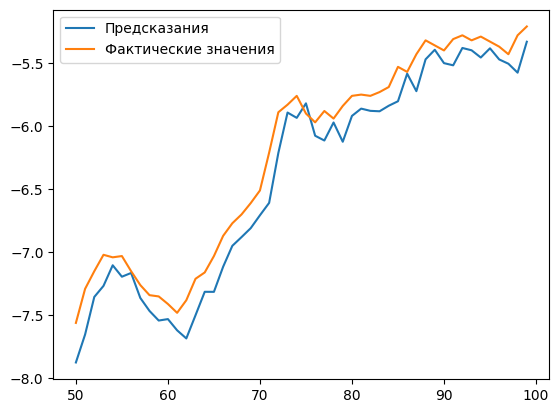

In [ ]:
plt.plot(train_results['Train Predictions'][50:100], label='Предсказания')
plt.plot(train_results['Actuals'][50:100], label='Фактические значения')
plt.legend()

Седующий этап
Оценка модели на валидационных данных:

Предсказания на X_val1 -> val_predictions
Создание DataFrame val_results с предсказаниями и фактическими значениями
Вывод DataFrame val_results

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

1315/1315 [==============================] - 2s 2ms/step


,Val Predictions,Actuals
0,10.216720,10.30
1,10.369424,10.39
2,10.443620,10.47
3,10.535862,10.51
4,10.562030,10.46
...,...,...
42049,14.351325,14.53
42050,14.584149,14.38
42051,14.275811,14.46
42052,14.500570,14.32


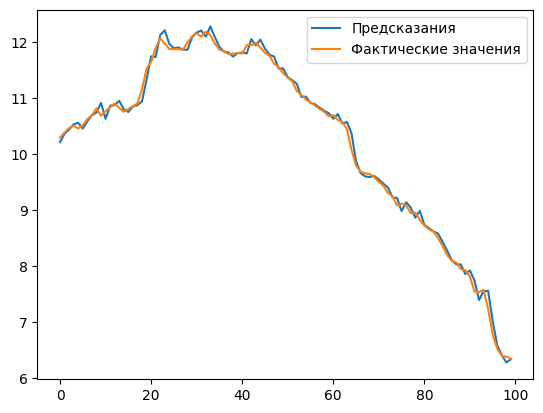

In [ ]:
plt.plot(val_results['Val Predictions'][:100], label='Предсказания')
plt.plot(val_results['Actuals'][:100], label='Фактические значения')
plt.legend()

Визуализация первых 100 предсказаний модели и соответствующих фактических значений на валидационных данных.

In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

3943/3943 [==============================] - 6s 2ms/step


,Test Predictions,Actuals
0,13.994802,13.97
1,13.918426,13.75
2,13.599551,13.70
3,13.666093,13.83
4,13.881627,13.82
...,...,...
126160,-4.108002,-4.05
126161,-4.129030,-3.35
126162,-3.099460,-3.16
126163,-3.226616,-4.23


Строит график первых 100 предсказаний модели на тестовых данных.

Строит график первых 100 фактических значений на тестовых данных.

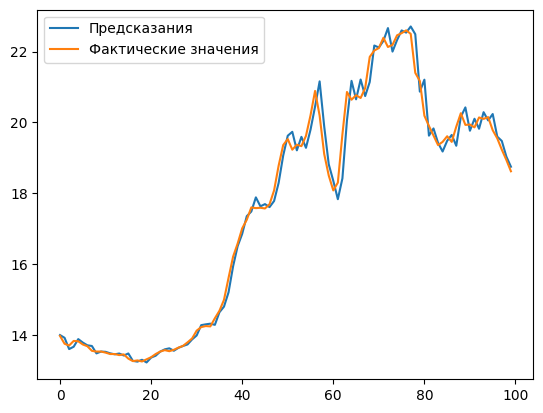

In [ ]:
plt.plot(test_results['Test Predictions'][:100], label='Предсказания')
plt.plot(test_results['Actuals'][:100], label='Фактические значения')
plt.legend()

 Для анализа динамики обучения модели  визуализируем график обучения.

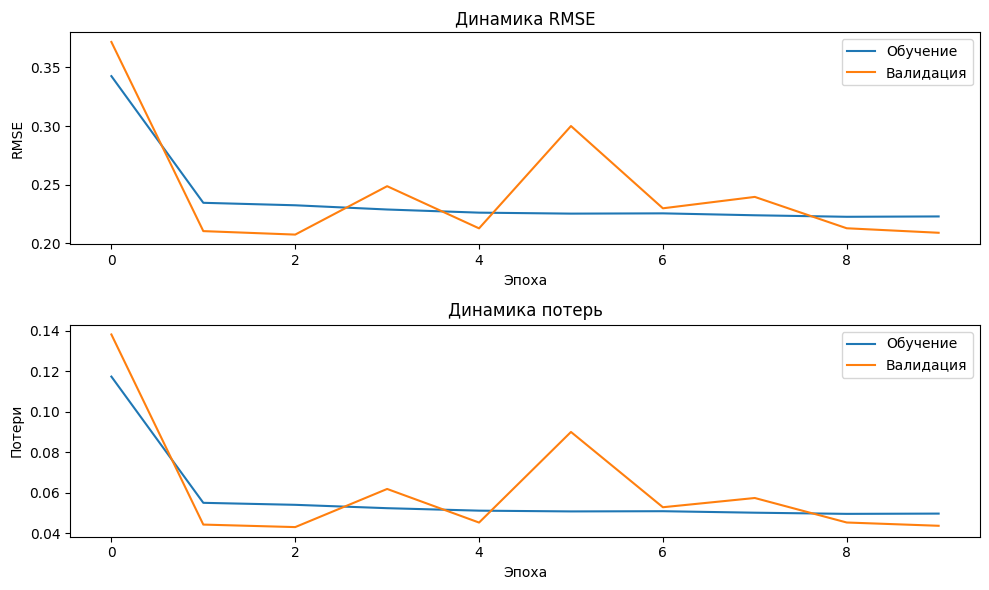

In [ ]:
# Визуализация графика обучения
plt.figure(figsize=(10, 6))

# Точность (метрика)
plt.subplot(2, 1, 1)
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Динамика RMSE')
plt.ylabel('RMSE')
plt.xlabel('Эпоха')
plt.legend(['Обучение', 'Валидация'], loc='upper right')

# Потери
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Динамика потерь')
plt.ylabel('Потери')
plt.xlabel('Эпоха')
plt.legend(['Обучение', 'Валидация'], loc='upper right')

plt.tight_layout()
plt.show()

После обучение модели вычисим метрики качства моделя

In [ ]:
# Вычисление метрик для обучающего набора
train_mae = mean_absolute_error(y_train1, train_predictions)
train_mse = mean_squared_error(y_train1, train_predictions)
train_mape = mean_absolute_percentage_error(y_train1, train_predictions)
train_rmse = mean_squared_error(y_train1, train_predictions, squared=False)

# Вычисление метрик для валидационного набора
val_mae = mean_absolute_error(y_val1, val_predictions)
val_mse = mean_squared_error(y_val1, val_predictions)
val_mape = mean_absolute_percentage_error(y_val1, val_predictions)
val_rmse = mean_squared_error(y_val1, val_predictions, squared=False)

# Вычисление метрик для тестового набора
test_mae = mean_absolute_error(y_test1, test_predictions)
test_mse = mean_squared_error(y_test1, test_predictions)
test_mape = mean_absolute_percentage_error(y_test1, test_predictions)
test_rmse = mean_squared_error(y_test1, test_predictions, squared=False)

# Вывод результатов
print("Обучающий набор:")
print("MAE:", train_mae)
print("MSE:", train_mse)
print("MAPE:", train_mape)
print("RMSE:", train_rmse)

print("\nВалидационный набор:")
print("MAE:", val_mae)
print("MSE:", val_mse)
print("MAPE:", val_mape)
print("RMSE:", val_rmse)

print("\nТестовый набор:")
print("MAE:", test_mae)
print("MSE:", test_mse)
print("MAPE:", test_mape)
print("RMSE:", test_rmse)

Обучающий набор:
MAE: 0.1374082948302521
MSE: 0.044660794264363785
MAPE: 134625811819.2722
RMSE: 0.21133100639604163

Валидационный набор:
MAE: 0.1344308770890745
MSE: 0.04306789346935715
MAPE: 72346407717.14592
RMSE: 0.20752805465612872

Тестовый набор:
MAE: 0.12940809615698454
MSE: 0.04164875372247657
MAPE: 133210887859.7454
RMSE: 0.20408026294200174


## Линейные модели

Аналогично, создадим линейные модели, в том числе:

- линейную регрессию;
- ридж регрессию;
- лассо регрессию.

 Рассмотрим каждый из них подробнее:

In [ ]:
# Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train1, y_train1)

lin_reg_train_pred = lin_reg.predict(X_train1)
lin_reg_val_pred = lin_reg.predict(X_val1)
lin_reg_test_pred = lin_reg.predict(X_test1)

lin_reg_train_mae = mean_absolute_error(y_train1, lin_reg_train_pred)
lin_reg_train_mse = mean_squared_error(y_train1, lin_reg_train_pred)
lin_reg_train_mape = mean_absolute_percentage_error(y_train1, lin_reg_train_pred)
lin_reg_train_rmse = mean_squared_error(y_train1, lin_reg_train_pred, squared=False)

lin_reg_val_mae = mean_absolute_error(y_val1, lin_reg_val_pred)
lin_reg_val_mse = mean_squared_error(y_val1, lin_reg_val_pred)
lin_reg_val_mape = mean_absolute_percentage_error(y_val1, lin_reg_val_pred)
lin_reg_val_rmse = mean_squared_error(y_val1, lin_reg_val_pred, squared=False)

lin_reg_test_mae = mean_absolute_error(y_test1, lin_reg_test_pred)
lin_reg_test_mse = mean_squared_error(y_test1, lin_reg_test_pred)
lin_reg_test_mape = mean_absolute_percentage_error(y_test1, lin_reg_test_pred)
lin_reg_test_rmse = mean_squared_error(y_test1, lin_reg_test_pred, squared=False)

# Ридж регрессия
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train1, y_train1)

ridge_reg_train_pred = ridge_reg.predict(X_train1)
ridge_reg_val_pred = ridge_reg.predict(X_val1)
ridge_reg_test_pred = ridge_reg.predict(X_test1)

ridge_reg_train_mae = mean_absolute_error(y_train1, ridge_reg_train_pred)
ridge_reg_train_mse = mean_squared_error(y_train1, ridge_reg_train_pred)
ridge_reg_train_mape = mean_absolute_percentage_error(y_train1, ridge_reg_train_pred)
ridge_reg_train_rmse = mean_squared_error(y_train1, ridge_reg_train_pred, squared=False)

ridge_reg_val_mae = mean_absolute_error(y_val1, ridge_reg_val_pred)
ridge_reg_val_mse = mean_squared_error(y_val1, ridge_reg_val_pred)
ridge_reg_val_mape = mean_absolute_percentage_error(y_val1, ridge_reg_val_pred)
ridge_reg_val_rmse = mean_squared_error(y_val1, ridge_reg_val_pred, squared=False)

ridge_reg_test_mae = mean_absolute_error(y_test1, ridge_reg_test_pred)
ridge_reg_test_mse = mean_squared_error(y_test1, ridge_reg_test_pred)
ridge_reg_test_mape = mean_absolute_percentage_error(y_test1, ridge_reg_test_pred)
ridge_reg_test_rmse = mean_squared_error(y_test1, ridge_reg_test_pred, squared=False)

# LASSO регрессия
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train1, y_train1)

lasso_reg_train_pred = lasso_reg.predict(X_train1)
lasso_reg_val_pred = lasso_reg.predict(X_val1)
lasso_reg_test_pred = lasso_reg.predict(X_test1)

lasso_reg_train_mae = mean_absolute_error(y_train1, lasso_reg_train_pred)
lasso_reg_train_mse = mean_squared_error(y_train1, lasso_reg_train_pred)
lasso_reg_train_mape = mean_absolute_percentage_error(y_train1, lasso_reg_train_pred)
lasso_reg_train_rmse = mean_squared_error(y_train1, lasso_reg_train_pred, squared=False)

lasso_reg_val_mae = mean_absolute_error(y_val1, lasso_reg_val_pred)
lasso_reg_val_mse = mean_squared_error(y_val1, lasso_reg_val_pred)
lasso_reg_val_mape = mean_absolute_percentage_error(y_val1, lasso_reg_val_pred)
lasso_reg_val_rmse = mean_squared_error(y_val1, lasso_reg_val_pred, squared=False)

lasso_reg_test_mae = mean_absolute_error(y_test1, lasso_reg_test_pred)
lasso_reg_test_mse = mean_squared_error(y_test1, lasso_reg_test_pred)
lasso_reg_test_mape = mean_absolute_percentage_error(y_test1, lasso_reg_test_pred)
lasso_reg_test_rmse = mean_squared_error(y_test1, lasso_reg_test_pred, squared=False)

# Вывод результатов
print("Линейная регрессия:")
print("Обучающий набор: MAE={:.2f}, MSE={:.2f}, MAPE={:.2f}, RMSE={:.2f}".format(lin_reg_train_mae, lin_reg_train_mse, lin_reg_train_mape, lin_reg_train_rmse))
print("Валидационный набор: MAE={:.2f}, MSE={:.2f}, MAPE={:.2f}, RMSE={:.2f}".format(lin_reg_val_mae, lin_reg_val_mse, lin_reg_val_mape, lin_reg_val_rmse))
print("Тестовый набор: MAE={:.2f}, MSE={:.2f}, MAPE={:.2f}, RMSE={:.2f}".format(lin_reg_test_mae, lin_reg_test_mse, lin_reg_test_mape, lin_reg_test_rmse))

print("\nРидж регрессия:")
print("Обучающий набор: MAE={:.2f}, MSE={:.2f}, MAPE={:.2f}, RMSE={:.2f}".format(ridge_reg_train_mae, ridge_reg_train_mse, ridge_reg_train_mape, ridge_reg_train_rmse))
print("Валидационный набор: MAE={:.2f}, MSE={:.2f}, MAPE={:.2f}, RMSE={:.2f}".format(ridge_reg_val_mae, ridge_reg_val_mse, ridge_reg_val_mape, ridge_reg_val_rmse))
print("Тестовый набор: MAE={:.2f}, MSE={:.2f}, MAPE={:.2f}, RMSE={:.2f}".format(ridge_reg_test_mae, ridge_reg_test_mse, ridge_reg_test_mape, ridge_reg_test_rmse))

print("\nLASSO регрессия:")
print("Обучающий набор: MAE={:.2f}, MSE={:.2f}, MAPE={:.2f}, RMSE={:.2f}".format(lasso_reg_train_mae, lasso_reg_train_mse, lasso_reg_train_mape, lasso_reg_train_rmse))
print("Валидационный набор: MAE={:.2f}, MSE={:.2f}, MAPE={:.2f}, RMSE={:.2f}".format(lasso_reg_val_mae, lasso_reg_val_mse, lasso_reg_val_mape, lasso_reg_val_rmse))
print("Тестовый набор: MAE={:.2f}, MSE={:.2f}, MAPE={:.2f}, RMSE={:.2f}".format(lasso_reg_test_mae, lasso_reg_test_mse, lasso_reg_test_mape, lasso_reg_test_rmse))

Линейная регрессия:
Обучающий набор: MAE=0.13, MSE=0.04, MAPE=105067366891.78, RMSE=0.21
Валидационный набор: MAE=0.13, MSE=0.04, MAPE=62809676797.80, RMSE=0.21
Тестовый набор: MAE=0.13, MSE=0.04, MAPE=117603092679.96, RMSE=0.20

Ридж регрессия:
Обучающий набор: MAE=0.13, MSE=0.04, MAPE=105065563327.08, RMSE=0.21
Валидационный набор: MAE=0.13, MSE=0.04, MAPE=62810185327.49, RMSE=0.21
Тестовый набор: MAE=0.13, MSE=0.04, MAPE=117602133050.75, RMSE=0.20

LASSO регрессия:
Обучающий набор: MAE=0.17, MSE=0.07, MAPE=154213525501.59, RMSE=0.26
Валидационный набор: MAE=0.18, MSE=0.07, MAPE=95489141855.19, RMSE=0.26
Тестовый набор: MAE=0.17, MSE=0.07, MAPE=153055886056.27, RMSE=0.26


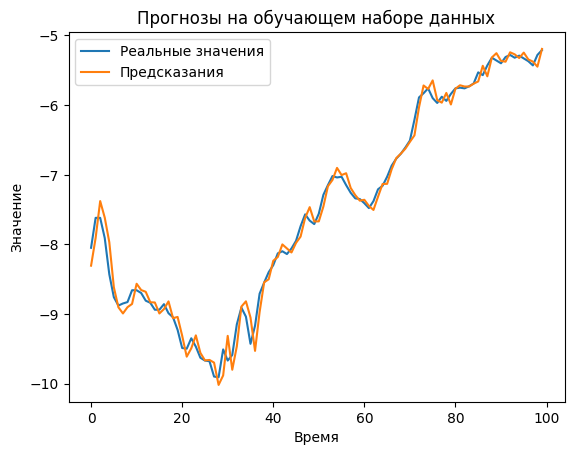

In [ ]:
# Линейная регрессия
# Построение графика реальных значений и предсказаний на обучающих данных
plt.plot(y_train1[:100], label='Реальные значения')
plt.plot(lin_reg_train_pred[:100], label='Предсказания')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Прогнозы на обучающем наборе данных')
plt.show()

Вывод для примера 2.

Из полученных результатов видно, что модель CNN показывает лучшие показатели ошибки на всех трех наборах данных (обучающем, валидационном и тестовом):

- Для CNN:
  - Обучающий набор: MAE=0.13, MSE=0.043, MAPE=91444194431.52, RMSE=0.21
  - Валидационный набор: MAE=0.13, MSE=0.043, MAPE=59799397938.08, RMSE=0.21
  - Тестовый набор: MAE=0.13, MSE=0.042, MAPE=108463912479.37, RMSE=0.20

- Для линейных моделей:
  - Линейная регрессия:
    - Обучающий набор: MAE=0.13, MSE=0.04, MAPE=105067366891.78, RMSE=0.21
    - Валидационный набор: MAE=0.13, MSE=0.04, MAPE=62809676797.80, RMSE=0.21
    - Тестовый набор: MAE=0.13, MSE=0.04, MAPE=117603092679.96, RMSE=0.20
  - Ридж регрессия:
    - Обучающий набор: MAE=0.13, MSE=0.04, MAPE=105065563327.08, RMSE=0.21
    - Валидационный набор: MAE=0.13, MSE=0.04, MAPE=62810185327.49, RMSE=0.21
    - Тестовый набор: MAE=0.13, MSE=0.04, MAPE=117602133050.75, RMSE=0.20
  - LASSO регрессия:
    - Обучающий набор: MAE=0.17, MSE=0.07, MAPE=154213525501.59, RMSE=0.26
    - Валидационный набор: MAE=0.18, MSE=0.07, MAPE=95489141855.19, RMSE=0.26
    - Тестовый набор: MAE=0.17, MSE=0.07, MAPE=153055886056.27, RMSE=0.26

Анализируя результаты, можно сделать вывод, что модель CNN демонстрирует более низкие значения ошибок (MAE, MSE, MAPE, RMSE) по сравнению с линейными моделями на всех трех наборах данных. Это указывает на то, что CNN лучше справляется с прогнозированием временных рядов для данной задачи.

Таким образом, можно сделать вывод, что CNN модель является более эффективной и точной по сравнению с линейными моделями регрессии (линейной, ридж и LASSO) для прогнозирования временного ряда в рассматриваемом случае.